In [18]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob 
!pip install wordcloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
base_url = "https://www.airlinequality.com/airline-reviews/frontier-airlines"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [20]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Never ever fly with Frontier...
1,"Not Verified | My husband, our children and I..."
2,Not Verified | Love them canceling my flight ...
3,✅ Trip Verified | \r\nThis airline takes all ...
4,✅ Trip Verified | The worst airline service t...


In [21]:
df.to_csv("FA_reviews.csv")

In [22]:
import pandas as pd

csv_path = "FA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

##print(df1['reviews'])

In [23]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [25]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
##print(df1)

In [26]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
##print(df1['reviews'])

C:\Users\Mat\AppData\Local\Temp\ipykernel_36288\1434772597.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [27]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
##print(df1.iloc[0,1])

my husband our children and i flew from sarasota to philadelphia when we got to philadelphia for our return flight home we were trying to do self check in and were notified that our flight had been cancelled and that we could either choose a different flight or a refund but no other assistance was given  the guy just walked away as we tried to decide what would be best to do we chose a refund and tried to book a later flight of course they wanted more money so we went to the counter to see if they could get us on that flight for the same price of the original cancelled flight and they kept saying theres nothing we can do this company nickels and dimes for everything all the way down to charging for customer service which was none existent anyway this was our first and last flight with frontier and i will make sure that i tell everyone i come in contact with not to fly with them


In [28]:
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
##print(df1.head(20))

In [29]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)

##saving space for Github
##print(df1)              

In [30]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    54.9
Neutral      2.8
Positive    42.3
dtype: float64

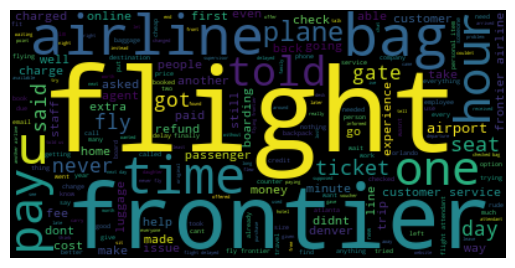

In [31]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

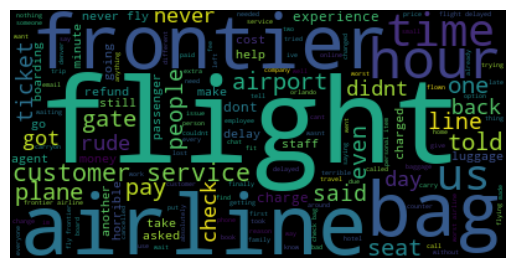

In [32]:
text2= " "        
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

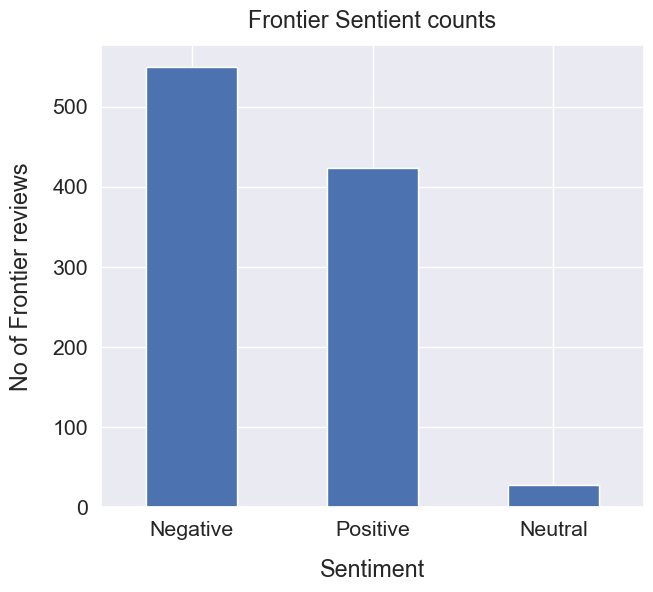

In [33]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of Frontier reviews", labelpad=14)
plt.title("Frontier Sentient counts", y=1.02);